## Project: Creating Customer Segments - Unsupervised Learning


## Author: Hugo Brandão

----
## 1. Introduction


### 1.1. Objective:
In this project, I will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.


### 1.2 Overview

In this project I will apply unsupervised learning techniques on product spending data collected for customers of a wholesale distributor in Lisbon, Portugal to identify customer segments hidden in the data. I will first explore the data by selecting a small subset to sample and determine if any product categories highly correlate with one another. Afterwards, I will preprocess the data by scaling each product category and then identifying (and removing) unwanted outliers. With the good, clean customer spending data, I will apply PCA transformations to the data and implement clustering algorithms to segment the transformed customer data. Finally, I will compare the segmentation found with an additional labeling and consider ways this information could assist the wholesale distributor with future service changes.

### 1.3 Highlights
This project is designed to give a hands-on experience with unsupervised learning and work towards developing conclusions for a potential client on a real-world dataset. Many companies today collect vast amounts of data on customers and clientele, and have a strong desire to understand the meaningful relationships hidden in their customer base. Being equipped with this information can assist a company engineer future products and services that best satisfy the demands or needs of their customers.

Things I will explore during this project:

- How to apply preprocessing techniques such as feature scaling and outlier detection.
- How to interpret data points that have been scaled, transformed, or reduced from PCA.
- How to analyze PCA dimensions and construct a new feature space.
- How to optimally cluster a set of data to find hidden patterns in a dataset.
- How to assess information given by cluster data and use it in a meaningful way.

### 1.4 Description
A wholesale distributor recently tested a change to their delivery method for some customers, by moving from a morning delivery service five days a week to a cheaper evening delivery service three days a week. 

Initial testing did not discover any significant unsatisfactory results, so they implemented the cheaper option for all customers. Almost immediately, the distributor began getting complaints about the delivery service change and customers were canceling deliveries, losing the distributor more money than what was being saved. 

I've been hired by the wholesale distributor to find what types of customers they have to help them make better, more informed business decisions in the future. My task is to use unsupervised learning techniques to see if any similarities exist between customers, and how to best segment customers into distinct categories.

### 1.5. Dataset:

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Each row of the dataset how much each customer spends on the following products (features):
* Fresh
* Milk
* Grocery
* Frozen
* Detergents_Paper
* Delicatessen

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt 
%matplotlib inline

# Import supplementary visualizations code visuals.py
import visuals as vs

# Load the wholesale customers dataset
data = pd.read_csv('customers.csv')
data.drop(['Region', 'Channel'], axis=1, inplace=True)

# set precision for the dataframes
pd.set_option('precision', 2)

In [2]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## 2. Data Exploration
In this section, I will begin exploring the data through visualizations and code to understand how each feature is related to the others. I will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which I will track through the course of this project.

I wil run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


### 2.1. Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of my choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until we obtain customers that vary significantly from one another.

In [4]:
# Select three indices of our choice that we wish to sample from the dataset
indices = [1, 129, 346]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
samples

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,42312,926,1510,1718,410,1819
2,2771,6939,15541,2693,6600,1115


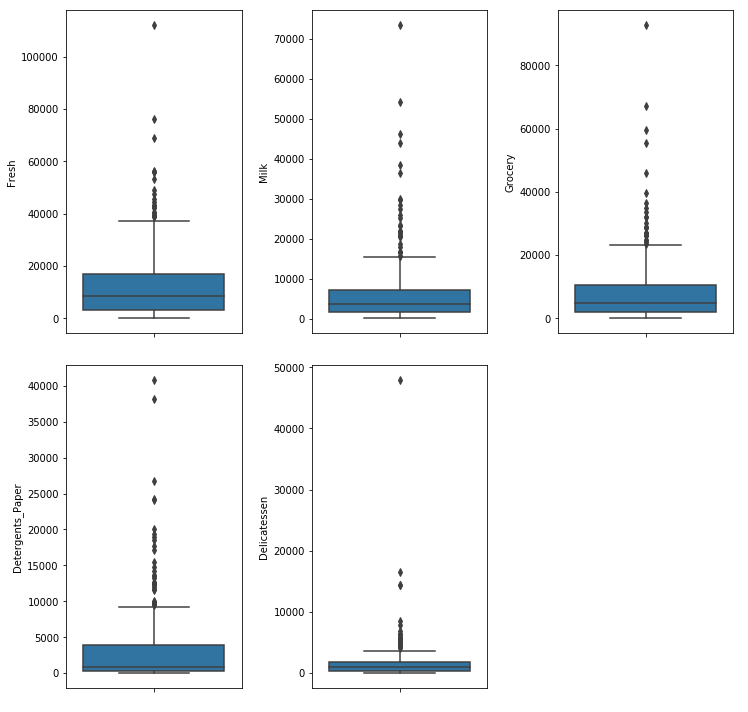

In [5]:
# box plot of features
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10, 10))
axs[-1, -1].axis('off')
fig.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.1)
sns.boxplot(data['Fresh'], orient='vertical', showfliers=True, ax=axs[0][0])
sns.boxplot(data['Milk'], orient='vertical', showfliers=True, ax=axs[0][1])
sns.boxplot(data['Grocery'], orient='vertical', showfliers=True, ax=axs[0][2])
sns.boxplot(data['Detergents_Paper'], orient='vertical', showfliers=True, ax=axs[1][0])
sns.boxplot(data['Delicatessen'], orient='vertical', showfliers=True, ax=axs[1][1])
plt.show()

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

The mean values are as follows:

* Fresh: 12000.2
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be?

**Answer:**

*** Sample 1: *** seems to be a market, because the client bought way above the average for milk, grocery and detergents_paper and delicatessen:

|  | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: | :-------------: |
| **Value**    | 7057 | 9810 | 9568 | 1762 | 3293 | 1776
| **Quantile** | Q2   | Q4   | Q3   |  Q2  |  Q3  | Q3

*** Sample 2: *** seems to be a greengrocer, because the client spent a lot on fresh food:

|  | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: | :-------------: |
| **Value**    | 42312 | 926 | 1510 | 1718 | 410 | 1819
| **Quantile** | Q4   | Q1   | Q1   |  Q3  |  Q2  | Q3

*** Sample 3: *** seems to be a grocery, because the client acquired much on grocery:

|  | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: | :-------------: |
| **Value**    | 2771 | 6939 | 15541 | 2693 | 6600 | 1115
| **Quantile** | Q1   | Q3   | Q4   |  Q3  |  Q4  | Q3


### 2.2. Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, I will implement the following:
 - Assign `new_data` a copy of the data by removing a feature of our choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as our target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
print('FEATURE {:12} \tSCORE {}'.format('',''))
print('---------------- \t--------- {}'.format('',''))

# print the each feature relevance
for feature in data.columns:
    new_data = data.drop(feature, axis=1)

    # Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=42)

    # Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor()
    regressor = regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print('{:20} \t{: 5f}'.format(feature, score))

FEATURE              	SCORE 
---------------- 	--------- 
Fresh                	-0.363835
Milk                 	 0.111714
Grocery              	 0.686774
Frozen               	-0.266786
Detergents_Paper     	 0.445224
Delicatessen         	-3.028535


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Answer:**

I tried to predict Grocery feature. The predicton score was 0.6861 which is not very high, thus I would recommend to keep it to identify customers' spending habits. 

The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

### 2.3. Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. 
If we found that the feature yeou attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. 
Conversely, if we believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

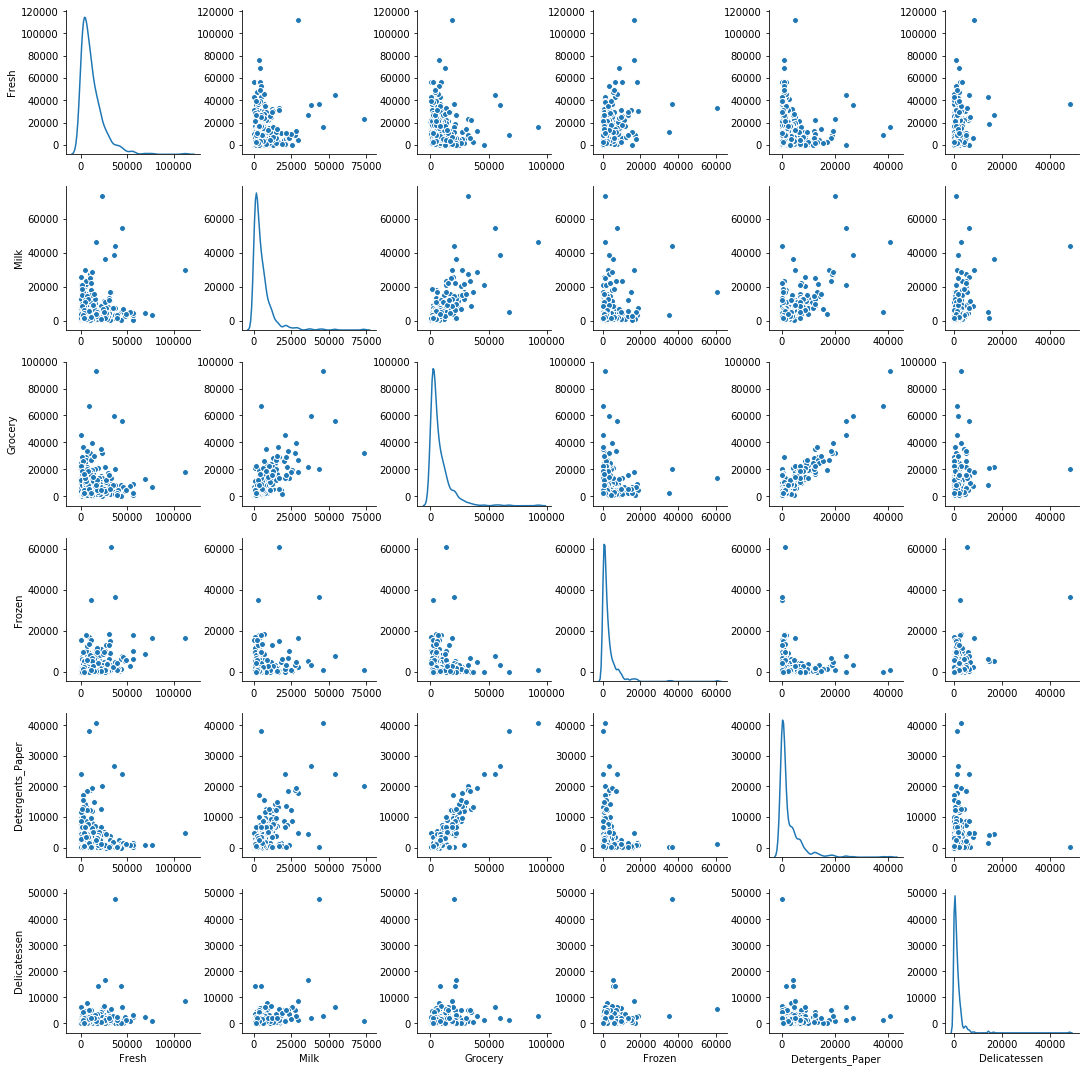

In [7]:
sns.pairplot(data, diag_kind='kde')

In [8]:
# compare mean and median to check normality of the distribution
for col in data.columns:
    print('%s:' % col)
    print('\tMean   %.2f' % np.mean(data[col]))
    print('\tMedian %.2f\n' % np.median(data[col]))

Fresh:
	Mean   12000.30
	Median 8504.00

Milk:
	Mean   5796.27
	Median 3627.00

Grocery:
	Mean   7951.28
	Median 4755.50

Frozen:
	Mean   3071.93
	Median 1526.00

Detergents_Paper:
	Mean   2881.49
	Median 816.50

Delicatessen:
	Mean   1524.87
	Median 965.50



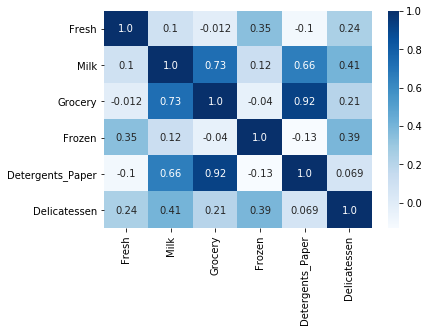

In [9]:
# check correlations between features
sns.heatmap(data.corr(), annot=True, fmt='.2', cmap='Blues')

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to separate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Answer:**

* The distribution of the data for any feature is not normal as we can see visually on PairPlot above and because Means are pretty different to Medians. All the distributions have longer tails on the right side, meaning that the majority of the values are somehow close to the mean, but there are a few values in the distributions that are pretty far to the right of the mean, that is, log-normal and right skewed distribution.
* As we can seem from the heatmap, the highest correlation is between Grocery and Detergents_Paper: 0.92. The second largest is between Grocery and Milk: 0.73. The third largest is between Milk and Detergents_Paper: 0.66. The other correlations are 0.39 or below.
* We previously saw that the score of predicting Grocery values was 0.6876 which is not perfect (score of 1) or poor (score of 0). Also we saw that Grocery has the two highest correlations (with Detergents_Paper and Milk), meaning that by knowing the values of Detergents_Paper and Milk we may have a fair value for Grocery. The correlations confirms the degree of importance of the Grocery feature itself.

## 3. Data Preprocessing
In this section, I will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results we obtain from our analysis are significant and meaningful.

### 3.1 Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, I will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

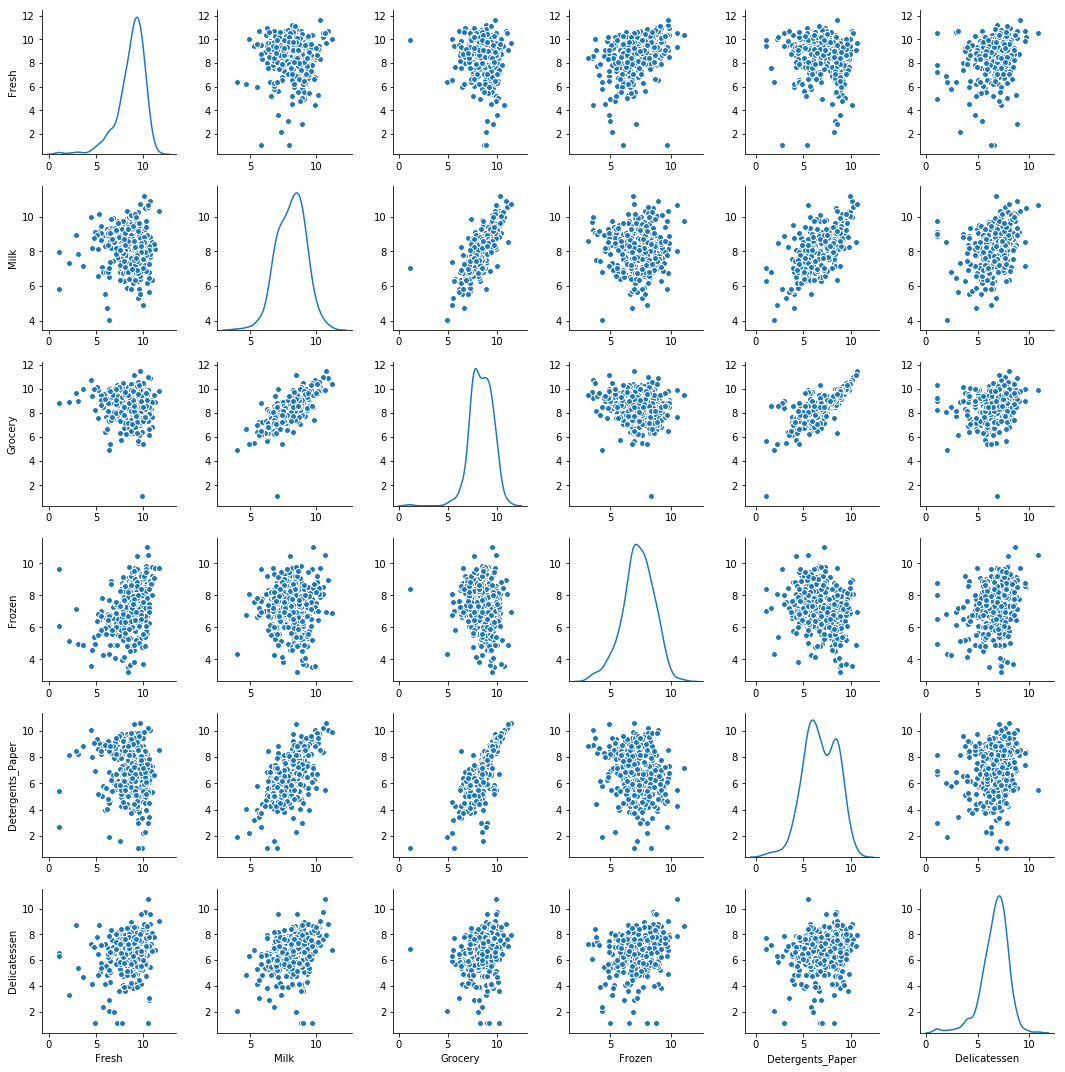

In [10]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = pd.DataFrame(log_data.loc[indices], columns = data.keys()).reset_index(drop = True)

# Produce a scatter matrix for each pair of newly-transformed features
sns.pairplot(log_data, diag_kind='kde')

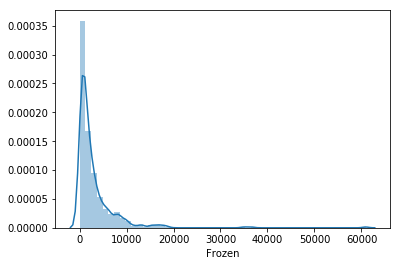

In [11]:
# Frozen distribution before log transformation
sns.distplot(data['Frozen'], bins=50)

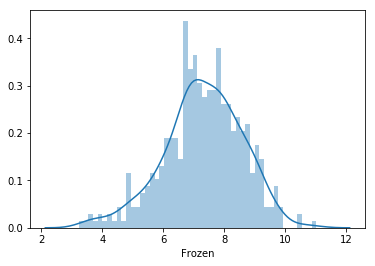

In [12]:
# Frozen distribution after log transformation
sns.distplot(log_data['Frozen'], bins=50)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features we may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [13]:
# Display the log-transformed sample data
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.86,9.19,9.17,7.47,8.10,7.48
1,10.65,6.83,7.32,7.45,6.02,7.51
2,7.93,8.84,9.65,7.90,8.79,7.02


### 3.2. Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, I will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If I choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once I have performed this implementation, the dataset will be stored in the variable `good_data`.

In [14]:
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,8.73,8.12,8.44,7.30,6.79,6.67
std,1.48,1.08,1.12,1.28,1.72,1.31
min,1.10,4.01,1.10,3.22,1.10,1.10
25%,8.05,7.33,7.67,6.61,5.55,6.01
50%,9.05,8.20,8.47,7.33,6.71,6.87
75%,9.74,8.88,9.27,8.18,8.27,7.51
max,11.63,11.21,11.44,11.02,10.62,10.78


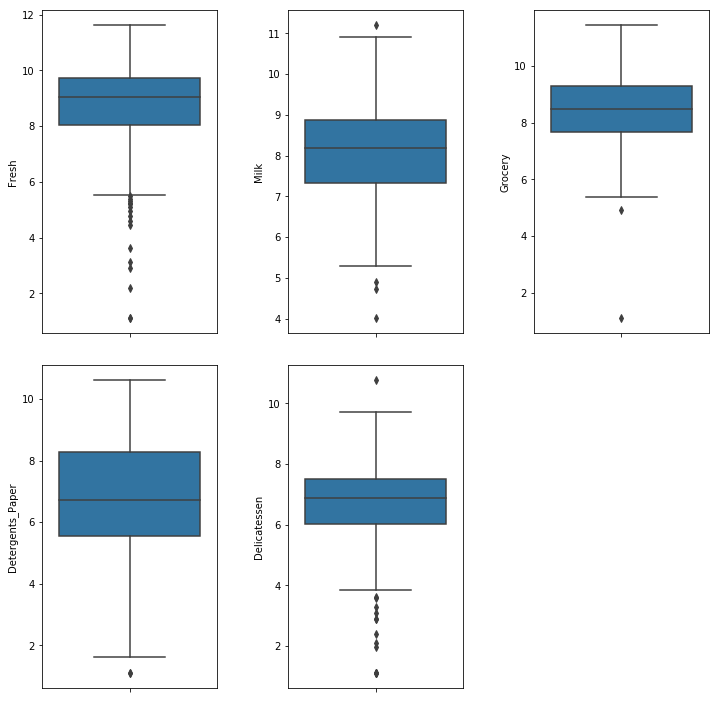

In [15]:
# box plot of features
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10, 10))
axs[-1, -1].axis('off')
fig.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.1)
sns.boxplot(log_data['Fresh'], orient='vertical', showfliers=True, ax=axs[0][0])
sns.boxplot(log_data['Milk'], orient='vertical', showfliers=True, ax=axs[0][1])
sns.boxplot(log_data['Grocery'], orient='vertical', showfliers=True, ax=axs[0][2])
sns.boxplot(log_data['Detergents_Paper'], orient='vertical', showfliers=True, ax=axs[1][0])
sns.boxplot(log_data['Delicatessen'], orient='vertical', showfliers=True, ax=axs[1][1])
plt.show()

In [16]:
# Count the index of outliers will be identified for all the features
from collections import Counter
cnt = Counter()

# Indexes of Outliers
outlier_idx = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    #print(Q1)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    #print(Q3)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    
    # Outliers of current feature
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]

    # Update the counter of outliers
    for i in outliers.index.values:
        cnt[i] += 1
    
    print(outliers.index.values)
    print('')
      
# Identify the outliers that occurs more than the min_frequency
min_frequency = 2
outlier_idx = {x : cnt[x] for x in cnt if cnt[x] >= min_frequency }
outlier_idx = list(outlier_idx.keys())
        
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outlier_idx]).reset_index(drop = True)

print("All data points considered outliers (outliers for more than one feature):")
#print(outlier_idx.values)
print(outlier_idx)

Data points considered outliers for the feature 'Fresh':
[ 65  66  81  95  96 128 171 193 218 304 305 338 353 355 357 412]

Data points considered outliers for the feature 'Milk':
[ 86  98 154 356]

Data points considered outliers for the feature 'Grocery':
[ 75 154]

Data points considered outliers for the feature 'Frozen':
[ 38  57  65 145 175 264 325 420 429 439]

Data points considered outliers for the feature 'Detergents_Paper':
[ 75 161]

Data points considered outliers for the feature 'Delicatessen':
[ 66 109 128 137 142 154 183 184 187 203 233 285 289 343]

All data points considered outliers (outliers for more than one feature):
[65, 66, 128, 154, 75]


In [17]:
# Outliers Data
data.loc[data.index[outlier_idx].values].sort_index()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
75,20398,1137,3,4407,3,975
128,140,8847,3823,142,1062,3
154,622,55,137,75,7,8


In [18]:
# Use original data to compare with Outliers Data
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [19]:
# Use clean data (without outliers) to compare with Outliers Data
good_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.00,435.00,435.00,435.00,435.00,435.00
mean,8.77,8.13,8.46,7.32,6.80,6.69
std,1.42,1.06,1.05,1.26,1.68,1.26
min,1.10,4.72,5.38,3.22,1.10,1.10
25%,8.07,7.36,7.68,6.65,5.56,6.02
50%,9.06,8.20,8.47,7.34,6.70,6.87
75%,9.74,8.88,9.27,8.18,8.28,7.51
max,11.63,11.21,11.44,11.02,10.62,10.78


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If we have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in uur analysis of whether or not to remove them.

**Answer:**

* The following data points are considered outliers for more than one feature:
 * Data point 65 is considered for Fresh and Frozen. For both features, the values are way below mean.
 * Data point 66 is considered for Fresh and Delicatessen. For both features, the values are way below mean.
 * Data point 75 is considered for Grocery and Detergents_Paper. For both features, the values are the minimum.
 * Data point 128 is considered for Fresh and Delicatessen. For both features, the values are way below mean.
 * Data point 154 is considered for Milk, Grocery and Delicatessen. For both features, the values are way below mean.

* These outliers should be removed as values of features that are very small for a annual spending amount (like 3 monetary unitsfor Detergents_Paper). This data could be wrong. Or if not, they may not represent a large or important customer segment as these 5 data points are just 1.1% of total population. 

## 4. Feature Transformation
In this section I will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### 4.1. Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, I will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

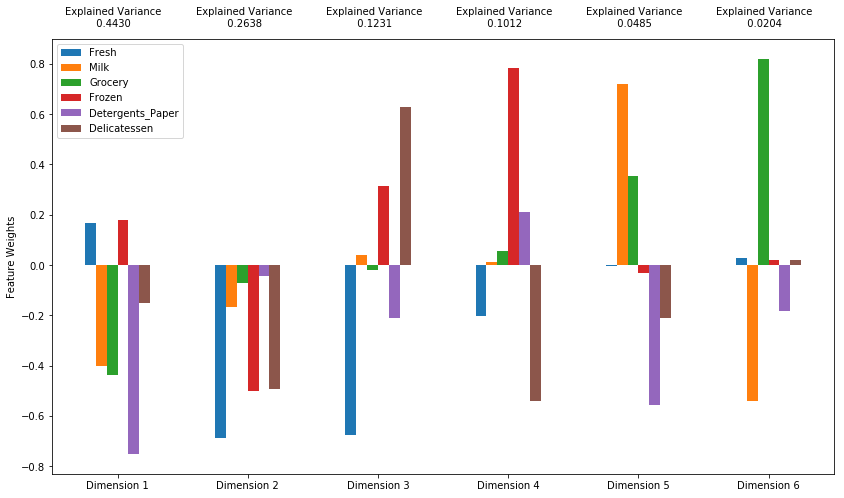

In [20]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [21]:
#pca_results = vs.pca_results(good_data, pca)

In [22]:
pca_results
# pca.components_
# pca.explained_variance_ratio_

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.44,1.68e-01,-0.40,-0.44,0.18,-0.75,-0.15
Dimension 2,0.26,-6.86e-01,-0.17,-0.07,-0.50,-0.04,-0.49
Dimension 3,0.12,-6.77e-01,0.04,-0.02,0.32,-0.21,0.63
Dimension 4,0.10,-2.04e-01,0.01,0.06,0.79,0.21,-0.54
Dimension 5,0.05,-2.60e-03,0.72,0.36,-0.03,-0.56,-0.21
Dimension 6,0.02,2.92e-02,-0.54,0.82,0.02,-0.18,0.02


In [23]:
# How much variance in the data is explained in total by the first and second principal components
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.70681723080681369

In [24]:
# How much variance in the data is explained in total by the first four components
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + \
pca.explained_variance_ratio_[2] + pca.explained_variance_ratio_[3]

0.9310901099509612

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension (both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
* 0.7252 is the variance in the data is explained in total by the first and second principal components.
* 0.9279 is the variance in the data is explained in total by the first four principal components.

* Dimensions discussion:

  * **Dimension 1**: this principal component is strongly and positively correlated with 3 of the original variables: Milk, Grocery and Detergents_Paper. This suggests that these 3 criteria vary together. If one increases, then the remaining ones tend to increase as well. This component can be viewed as how an establishment is similar to a market.
 
  * **Dimension 2**: this prinpical component is strongly and positively correlated with 3 of the original variables: Fresh, Frozen and Delicatessen. This suggests that these 3 criteria vary together. If one increases, then the remaining ones tend to increase as well. This component can be viewed as how an establishment is similar to a greengrocer.
 
  * **Dimension 3**: this prinpical component is strongly correlated with 2 of the original variables: Fresh and Delicatessen. Fresh has as negative correlation, while Delicatessen has a positive correlation. Meaninig that, if one increases the other tend to decrease. This component can be viewed as how an establishment is similar to a delicatessen.
  
  * **Dimension 4**: this prinpical component is strongly correlated with 2 of the original variables: Frozen and Delicatessen. Frozen has as negative correlation, while Delicatessen has a positive correlation. Meaninig that, if one increases the other tend to decrease. This component can be viewed as how an establishment is similar to a delicatessen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with our initial interpretation of the sample points.

In [25]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.79,-0.81,0.23,-3.60e-03,0.12,-0.21
1,1.83,-1.43,-0.59,-9.72e-01,-1.08,-0.02
2,-2.40,-0.16,0.54,9.41e-01,-0.26,0.22


### 4.2. Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a significant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, I will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [26]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)

# Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(data=reduced_data, columns=['Dimension 1', 'Dimension 2'])

In [27]:
reduced_data.head()

,Dimension 1,Dimension 2
0,-1.76,9.71e-03
1,-1.79,-8.12e-01
2,-1.88,-1.60e+00
3,1.16,-1.41e+00
4,-0.78,-2.39e+00


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [28]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.79,-0.81
1,1.83,-1.43
2,-2.40,-0.16


## 5. Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

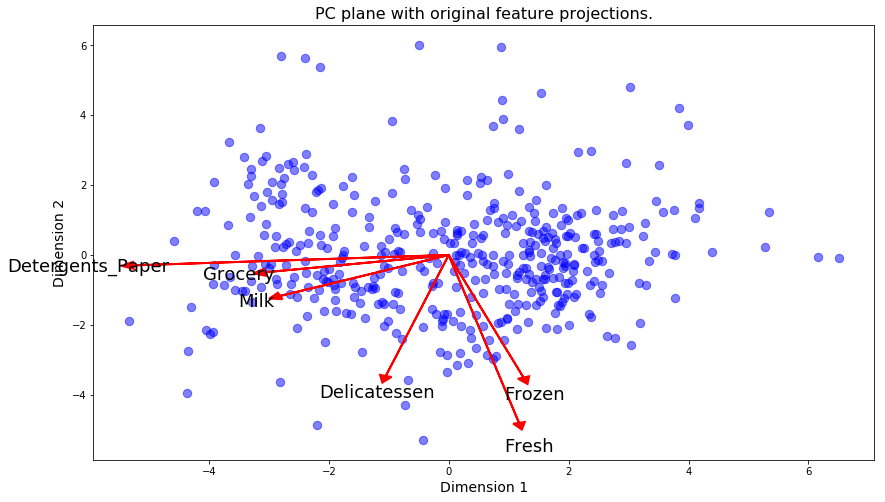

In [29]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer: **Detergents_Paper, Milk and Grocery are the most correlated to the First Component (Dimension 1).
Frozen, Fresh and Delicatessen are the most  correlated to the Second Component (Dimension 2).

## 6. Clustering

In this section, I will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. I will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* **K-Means Advantages:**
 1. Practically work well even some assumptions are broken
 2. Simple, easy to implement the clustering results
 3. Fast and efficient in terms of computational cost, typically O(K*n*d). If variables are huge, then K-Means most of the times computationally faster than hierarchical clustering, if we keep k smalls.
 4. K-Means produce tighter clusters than hierarchical clustering, especially if the clusters are globular.
 [Source 1](http://playwidtech.blogspot.com/2013/02/k-means-clustering-advantages-and.html), [Source 2](https://www.quora.com/What-are-the-advantages-of-K-Means-clustering)

 
* **GMM Advantages:**
 1. GMM is a lot more flexible in terms of cluster covariance: K-Means is actually a special case of GMM in which each cluster’s covariance along all dimensions approaches 0. This implies that a point will get assigned only to the cluster closest to it. With GMM, each cluster can have unconstrained covariance structure. Think of rotated and/or elongated distribution of points in a cluster, instead of spherical as in K-Means. As a result, cluster assignment is much more flexible in GMM than in K-Means. Image below is from scikit-learn documentation on GMM.
 2. Another implication of its covariance structure is that GMM allows for mixed membership of points to clusters. In K-Means, a point belongs to one and only one cluster, whereas in GMM a point belongs to each cluster to a different degree. The degree is based on the probability of the point being generated from each cluster’s (multivariate) normal distribution, with cluster center as the distribution’s mean and cluster covariance as its covariance. Depending on the task, mixed membership may be more appropriate (e.g. news articles can belong to multiple topic clusters) or not (e.g. organisms can belong to only one species).
 [Source](https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm)
 
 
* **Some key differences between the models:** [Source](https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian)
 * **Speed/Scalability**:
   * K-Means is faster and more scalable.
   * GMM is slower as it uses information about the data distribution — e.g., probabilities of points belonging to clusters.
 * **Cluster assignment**:
   * K-Means results in hard assignment of points to cluster (as it assumes clusters to be symmetrical spherical shapes).
   * GMM results in soft assignment, as it uses more information about the data (it assumes the clusters to be elliptical in shape)
  
Given what I have seen so far of the wholesale customer data, many products could be sold in different establishments, for example, milk could be sold at a market or grocery store. Therefore I would recommend to go with GMM because it is a soft clustering methods which allows clusters to overlap, differently from K-Means which is a hard clustering method which allots a data point to just belong to a single cluster.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, I will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [30]:
# silhouette_score measures thow a data point is similar to its assigned cluster
from sklearn.metrics import silhouette_score

In [31]:
# import models
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [32]:
#samples2 = pd.DataFrame(reduced_data.loc[indices], columns = reduced_data.keys()).reset_index(drop = True)

# samples after PCA transformation
#samples_PCA = pd.DataFrame(reduced_data.loc[indices], columns=reduced_data.keys()).reset_index(drop=True)
samples = pd.DataFrame(reduced_data.loc[indices], columns=reduced_data.keys()).reset_index(drop=True)

In [33]:
# K-Means - Silhouette Scores
print('Silhouette Score for:')

for nclust in range(2, 16):

    # Apply our clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=nclust).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.cluster_centers_
    # center of GMM is clusterer.means_ not clusterer.cluster_centers_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)

    print('{} clusters:\t\t{}'.format(nclust, score.round(4)))

Silhouette Score for:
2 clusters:		0.4263
3 clusters:		0.3971
4 clusters:		0.3312
5 clusters:		0.3493
6 clusters:		0.3645
7 clusters:		0.3652
8 clusters:		0.3562
9 clusters:		0.3476
10 clusters:		0.3521
11 clusters:		0.3681
12 clusters:		0.3568
13 clusters:		0.3534
14 clusters:		0.3714
15 clusters:		0.3472


In [34]:
# GMM - Silhouette Scores
print('Silhouette Score for:')

for nclust in range(2, 20):

    # Apply our clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=nclust, covariance_type='full').fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)

    print('{} clusters:\t\t{}'.format(nclust, score.round(4)))

Silhouette Score for:
2 clusters:		0.4219
3 clusters:		0.3852
4 clusters:		0.3017
5 clusters:		0.2256
6 clusters:		0.2889
7 clusters:		0.326
8 clusters:		0.2991
9 clusters:		0.3009
10 clusters:		0.3078
11 clusters:		0.3159
12 clusters:		0.2983
13 clusters:		0.3317
14 clusters:		0.2872
15 clusters:		0.3009
16 clusters:		0.32
17 clusters:		0.3081
18 clusters:		0.3173
19 clusters:		0.3251


** Although GMM was my primary choice for this problem, K-Means with 2 clusters performed better than GMM. 
Therefore that will be my model. **

In [35]:
# Set clusterer with the highestSilhouette Score: K-Means with 2 clusters
clusterer = KMeans(n_clusters=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(samples)
score = silhouette_score(reduced_data, preds)

### Question 7

* Report the silhouette score for several cluster numbers we tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
* K-Means with 2 clusters has the best silhouette score of 0.4472.

### 6.1 Cluster Visualization
Once I've chosen the optimal number of clusters for my clustering algorithm using the scoring metric above, I can now visualize the results by executing the code block below. Note that, for experimentation purposes, we are welcome to adjust the number of clusters for our clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

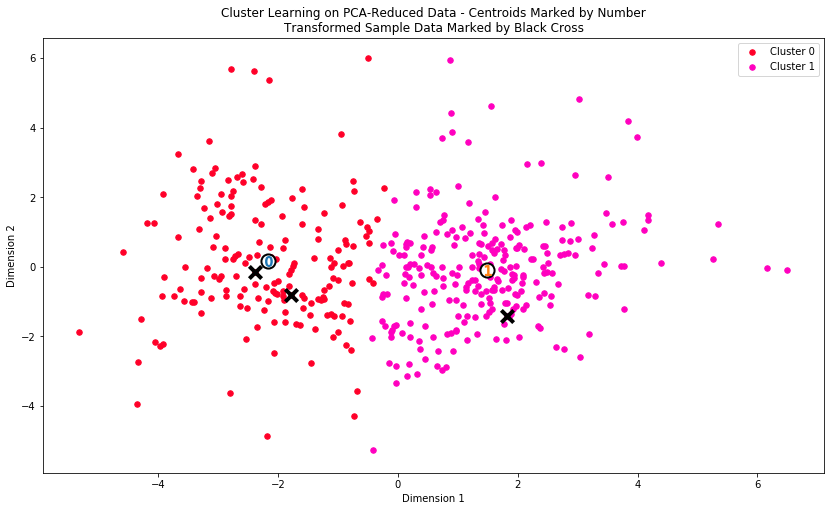

In [36]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### 6.2. Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, I will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.

In [37]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print('True centers:')
display(true_centers)

True centers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


In [38]:
# Use this data to compare with True centers
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Comparing the quantiles for all the features of each average customer (of each segment) we can get an idea of what kind of establishment s/he buys:

| Quantile/Segment | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen | Establishment
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: | :-------------: |
| **Segment 0** | Q2 | Q4 | Q4 | Q2 | Q4 | Q3 | Market
| **Segment 1** | Q3 | Q2 | Q2 | Q3 | Q2 | Q2 | Supermarket

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [39]:
# import euclidean library to calculate the distances between the samples and true centers
from scipy.spatial.distance import euclidean

# define samples with original data
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

In [40]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,42312,926,1510,1718,410,1819
2,2771,6939,15541,2693,6600,1115


In [41]:
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


In [42]:
# Display the predictions and distances
for i, pred in enumerate(sample_preds):
    # Predictions
    print("Sample point", i, "predicted to be in Cluster", pred)
    # Euclidean distances shows that the the samples are assigned to the closet cluster center
    for j in range(true_centers.shape[0]):
        dist = np.round(euclidean(samples.loc[i], true_centers.iloc[j],), decimals=0)
        print("Distance between Sample Point and Cluster", j, "is", dist)
    print()

Sample point 0 predicted to be in Cluster 0
Distance between Sample Point and Cluster 0 is 4712.0
Distance between Sample Point and Cluster 1 is 11246.0

Sample point 1 predicted to be in Cluster 1
Distance between Sample Point and Cluster 0 is 40580.0
Distance between Sample Point and Cluster 1 is 33495.0

Sample point 2 predicted to be in Cluster 0
Distance between Sample Point and Cluster 0 is 4632.0
Distance between Sample Point and Cluster 1 is 16540.0



**Answer:**

 * **Sample point 0**: initially was thought to be a customer buying in a market, because of high spending on milk, grocery and detergents_paper. It is aligned with the prediction.
 * **Sample point 1**: initially was thought to be customer buying in a greengrocer, because of high spending on fresh, frozen and delicatessen. It seems aligned with the prediction, because of you can find a large variety of products in a supermarket and may include almost or maybe everything that a greengrocer can offer.
 * **Sample point 3**: initially was thought to be a customer buying in a grocery, because of high spending on grocery and detergents_paper. It is aligned with the prediction and Sample point 0.

## 7. Conclusion

In this final section, I will investigate ways that I can make use of the clustered data. First, I will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, I will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, I will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
 * Changing delivery service may affect different clients differently. And to know that it would be recommended to test doing nothing for a part of each customer segments and for the rest, change the delivery services.
 * After this A/B test, it would be possible to know if any customer segment would recommend positively.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
 * Estimated product spending of the new customers could be used as an input to the learner model to predict their customer segments (target variable).

### 7.1. Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, I will find the sample points are circled in the plot, which will identify their labeling.

In [43]:
reduced_data.head()

,Dimension 1,Dimension 2
0,-1.76,9.71e-03
1,-1.79,-8.12e-01
2,-1.88,-1.60e+00
3,1.16,-1.41e+00
4,-0.78,-2.39e+00


In [44]:
outliers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.20,7.34,8.91,5.16,8.15,3.30
109,7.25,9.72,10.27,6.51,6.73,1.10
128,4.94,9.09,8.25,4.96,6.97,1.10
137,8.03,9.00,9.02,6.49,6.58,3.58
142,10.52,8.88,9.02,8.00,3.00,1.10


In [45]:
pca_samples

array([[-1.7886645 , -0.81225054],
       [ 1.82509896, -1.42623811],
       [-2.39580531, -0.15924928]])

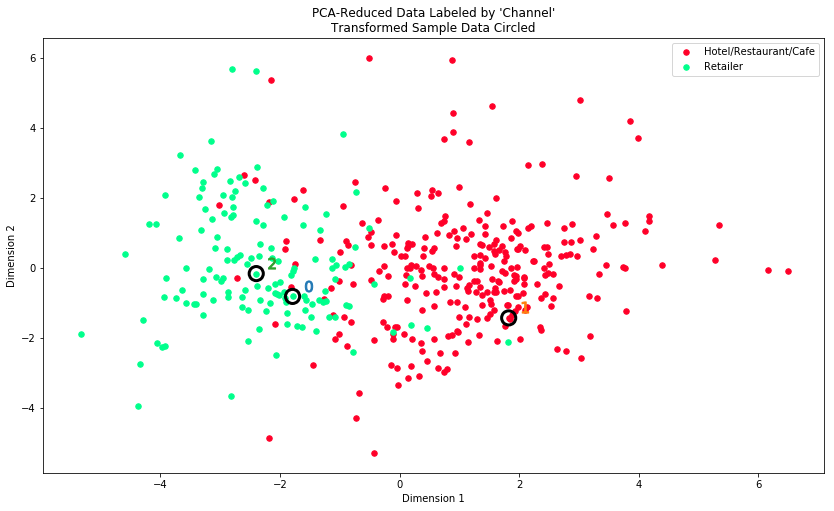

In [46]:
# Display the clustering results (excluding the outliers) based on 'Channel' data
vs.channel_results(reduced_data, outlier_idx, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answers:**
 * Both K-Means and GMM indicated 2 as the optimal number of clusters which is confirmed by the Channel feature that it is now explored.
 * Yes, there are. But it seems they are the extreme point on Dimension 1. For instance, for data points which values of Dimension 1 close to -4, all the points close to it (no matter the value of Dimension 2) are in the cluster Hotel/Restaurant/Cafe. And the same applies for data points which values of Dimension 1 are higher than 4, which indicates they belong to the cluster Retailer.
 * It is consistent, but the customer segmentation is not perfect as it segments the clients basically on Dimension 1 around -0.5, meaning that, all data points with Dimension 1 value lower than ~ -0.5 belong to one segment, and the remaining to the other segment. But on the real channel classification, we see the overlapping of these two segments mostly concentrated around values of -1 for the Dimension 1.